In [7]:
import json 
import numpy as np 
import sys 
from collections import defaultdict
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def gather(models, datasets):

    rows = []
    for model in models:
        for dataset in datasets:
            results_file = "results/%s__%s.json" % (model, dataset)
            with open(results_file, 'r') as f:
                results = json.load(f)
            
            for i, r in enumerate(results):
                rows.append({
                    "split" : i,
                    "bacc" : r['bacc'],
                    "auc-roc" : r['auc-roc'],
                    "xe" : r['xe'],
                    "model" : model,
                    "dataset" : dataset
                })

    df = pd.DataFrame(rows)
    
    return df 

df = gather(['bkt', 'bkt-sd', 'ldkt-sd', 'dash-sd', 'dash', 'dkt'],
            ['algebra2010', 'assistment', 'junyi', 'kdd2010', 'statics2011', 'synthetic'])
df

,split,bacc,auc-roc,xe,model,dataset
0,0,0.657672,0.714029,0.481493,bkt,algebra2010
1,1,0.656553,0.712133,0.481699,bkt,algebra2010
2,2,0.654702,0.709646,0.484953,bkt,algebra2010
3,3,0.659191,0.715435,0.484680,bkt,algebra2010
4,4,0.654491,0.713486,0.483786,bkt,algebra2010
...,...,...,...,...,...,...
175,0,0.797029,0.872826,0.413697,dkt,synthetic
176,1,0.800295,0.874926,0.409363,dkt,synthetic
177,2,0.795265,0.872722,0.412317,dkt,synthetic
178,3,0.798883,0.874607,0.414533,dkt,synthetic


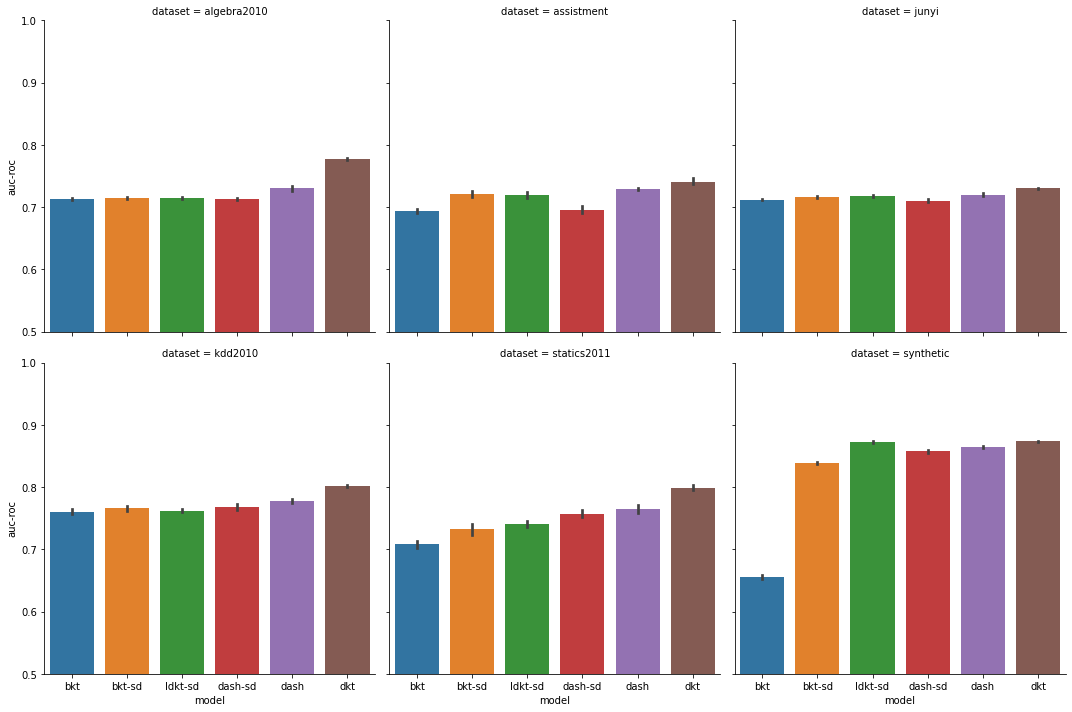

In [20]:
g = sns.catplot(x="model", y="auc-roc", col="dataset", data=df, kind="bar", col_wrap=3)
axes = g.axes.flatten()
for ax in axes:
    ax.set_ylim([0.5, 1.0])